# Simple Spreadsheet Analysis

Lea Demri

11/02/2019

## Import Libraries

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Format Data


I copied the .xlsx document and saved it in .csv format. I import the data as a dataframe.

In [196]:
mydata = pd.read_csv(r"C:\Users\Lea\Documents\DataAnalystExercise.csv")
mydata.head()

,Account Manager,Client Name,Date of Contact
0,Milan Crona,"Wyman, Farrell and Haag",10/31/2015
1,Aidan Pouros,"Veum, McClure and Schuster",12/15/2013
2,Aidan Pouros,"Veum, McClure and Schuster",12/7/2013
3,Milan Crona,Armstrong Group,11/2/2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",12/25/2013


## Data Analysis

In [197]:
mydata.isnull().values.any()

False

Data is clean and has no missing values.

In [198]:
mydata.dtypes

Account Manager    object
Client Name        object
Date of Contact    object
dtype: object

In [199]:
mydata.describe()

,Account Manager,Client Name,Date of Contact
count,1001,1001,1001
unique,4,35,704
top,Milan Crona,Eichmann and Sons,10/11/2013
freq,286,38,7


It shows that October 2013 has the maximum number of clients contacted.

I split the Date of Contact coloumn intp Month, Day, and Year columns:

In [200]:
mydata["Month"], mydata["Day"], mydata["Year"] = zip(*mydata["Date of Contact"].map(lambda x: x.split("/")))

In [201]:
mydata.head()

,Account Manager,Client Name,Date of Contact,Month,Day,Year
0,Milan Crona,"Wyman, Farrell and Haag",10/31/2015,10,31,2015
1,Aidan Pouros,"Veum, McClure and Schuster",12/15/2013,12,15,2013
2,Aidan Pouros,"Veum, McClure and Schuster",12/7/2013,12,7,2013
3,Milan Crona,Armstrong Group,11/2/2013,11,2,2013
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",12/25/2013,12,25,2013


In [202]:
mydata.describe()

,Account Manager,Client Name,Date of Contact,Month,Day,Year
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,12,31,5
top,Milan Crona,Eichmann and Sons,10/11/2013,10,19,2014
freq,286,38,7,213,44,264


It shows that 2014 has the maximum number of clients contacted. Let us look at the number of client contacts by month:

In [203]:
mydata_month = mydata.groupby(["Month"])["Client Name"].count().reset_index(name = "Number of Clients").sort_values(["Number of Clients"], ascending = False)

In [204]:
mydata_month

,Month,Number of Clients
1,10,213
11,9,121
10,8,79
3,12,77
8,6,77
7,5,69
9,7,66
2,11,65
4,2,64
0,1,60


There are 35 unique clients, therefore the same clients may have been contacted several times. We need to look at the maximum of unique clients contacted.

In [205]:
mydata_clients = mydata.groupby(["Year", "Month", "Client Name"])["Client Name"].count().reset_index(name = "Number of Clients").sort_values(["Number of Clients"], ascending = False)

This confirms our previous assumption. Let us look at the unique clients contacted by month.

In [206]:
mydata_unique_clients_month = mydata.groupby("Month")[("Client Name")].nunique().reset_index(name = "Number of Unique Clients").sort_values(["Number of Unique Clients"], ascending = False)

In [207]:
mydata_clients

,Year,Month,Client Name,Number of Clients
285,2015,10,"Wyman, Farrell and Haag",7
5,2013,10,Donnelly-Champlin,6
74,2014,10,Eichmann and Sons,5
72,2014,10,"Denesik, Stehr and Carter",5
258,2015,10,Abbott Group,4
17,2013,10,"Kuhic, Stark and Kreiger",4
23,2013,10,Ondricka-Wolff,4
466,2016,10,Walter Inc,4
591,2016,9,"Anderson, Kutch and Hyatt",4
453,2016,10,"Hermiston, Armstrong and Balistreri",4


In [208]:
mydata_unique_clients_month

,Month,Number of Unique Clients
1,10,35
8,6,34
7,5,33
10,8,33
11,9,33
3,12,32
4,2,31
0,1,30
2,11,30
5,3,29


#### This shows that October is the month with the maximum number of unique clients contacted.

## Data Visualization

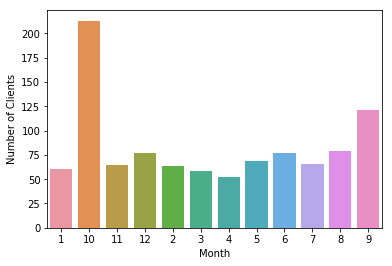

In [209]:
sns.barplot(x = "Month", y = "Number of Clients", data = mydata_month);

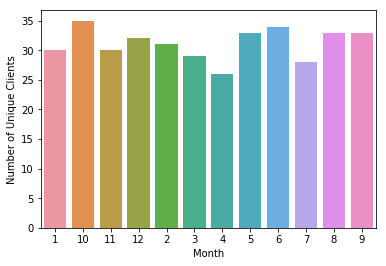

In [210]:
sns.barplot(x = "Month", y = "Number of Unique Clients", data = mydata_unique_clients_month);

## Share of Clients Contacted

Now, let us look at the share of clients contacted by month.

In [224]:
def percentage_contact_clients():
    mydata_month = mydata.groupby("Month")
    clients_count = mydata_month["Client Name"].nunique()
    unique_clients_total_count = mydata["Client Name"].nunique()
    share = 100 * (clients_count/unique_clients_total_count)
    dic = {}
    l = 0
    for k in mydata_month:
        dic[k[0]] = share[l]
        l = l + 1
    print(share)
    print("The month in which the greatest percentage of clients where contacted is:", max(dic, key = dic.get), ".")


In [225]:
percentage_contact_clients()

Month
1      85.714286
10    100.000000
11     85.714286
12     91.428571
2      88.571429
3      82.857143
4      74.285714
5      94.285714
6      97.142857
7      80.000000
8      94.285714
9      94.285714
Name: Client Name, dtype: float64
The month in which the greatest percentage of clients where contacted is: 10 .


Now, let us look at the share of unique clients contacted by month and year.

In [231]:
  def percentage_contact_clients_month_year():
    years = list(mydata.Year.unique())
    for x in years:
        mydata_year = mydata[mydata["Year"] == x]
        clients_count = mydata_year.groupby(["Month"])['Client Name'].nunique()
        unique_clients_total_count = mydata_year["Client Name"].nunique()
        share = 100 * (clients_count/unique_clients_total_count)
        dic = {}
        l = 0
        for k in mydata_year.groupby(["Month"]):
            dic[k[0]] = share[l]
            l = l + 1  
        print("The month in which the maximum number of unique clients were contacted in", x, " is:", max(dic, key = dic.get), "with a percentage of:", round(dic[max(dic, key = dic.get)], 4),".")
        plt.bar(range(len(dic)), list(dic.values()), align = "center")
        plt.xticks(range(len(dic)), list(dic.keys()))
        plt.show()

The month in which the maximum number of unique clients were contacted in 2015  is: 10 with a percentage of: 80.0 .


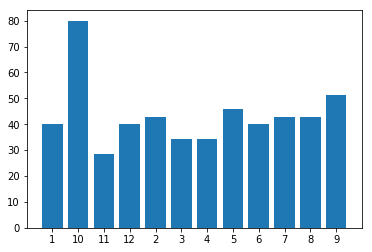

The month in which the maximum number of unique clients were contacted in 2013  is: 10 with a percentage of: 88.5714 .


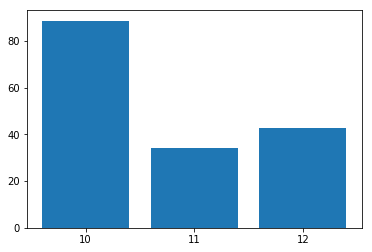

The month in which the maximum number of unique clients were contacted in 2016  is: 10 with a percentage of: 71.4286 .


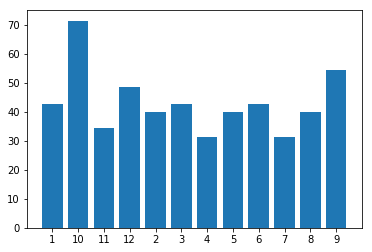

The month in which the maximum number of unique clients were contacted in 2014  is: 10 with a percentage of: 80.0 .


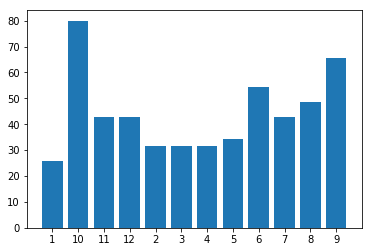

The month in which the maximum number of unique clients were contacted in 2017  is: 9 with a percentage of: 60.0 .


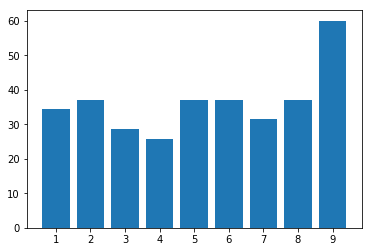

In [232]:
percentage_contact_clients_month_year()